In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import folium

%matplotlib inline

### Initial Quesitons
---
<ol>
    <li>What years does the data set cover?</li>
    <li>What neighborhoods have the most graffiti?</li>
    <li>What types of graffiti are most prominent?</li>
    <li>How many cases are still open? How many are closed? Which neighborhoods have the highest open cases? Closed?</li>
    <li>Explore "offensive" graffiti. Is there more offensive graffiti than not?</li>
</ol>

In [13]:
sf_graffiti = pd.read_csv('../data/Graffiti.csv')
sf_graffiti.head()

,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,Address,Supervisor District,Neighborhood,Point,Source,Media URL
0,10931260,05/30/2019 04:24:00 PM,07/18/2020 01:00:33 AM,07/18/2020 01:00:33 AM,Closed,Administrative Closure - Case has aged - resub...,SFFD Other Queue,Graffiti,Graffiti on Other_enter_additional_details_below,Other_enter_additional_details_below - Offensive,"1515 SUTTER ST, SAN FRANCISCO, CA, 94109",5.0,Cathedral Hill,"(37.786838, -122.425451)",Mobile/Open311,http://mobile311.sfgov.org/reports/10931260/ph...
1,10893175,05/21/2019 06:51:00 PM,07/18/2020 01:00:33 AM,07/18/2020 01:00:33 AM,Closed,Administrative Closure - Case has aged - resub...,SFFD Other Queue,Graffiti,Graffiti on Building_commercial,Building_commercial - Not_Offensive,"109 OAK ST, SAN FRANCISCO, CA, 94102",5.0,Civic Center,"(37.7748711, -122.4209067)",Web,NaN
2,12088529,02/15/2020 11:02:23 AM,02/20/2020 09:50:01 AM,02/20/2020 09:50:01 AM,Closed,Case Resolved - meter shop has closed this req...,DPT Meter_Bike Queue,Graffiti,Graffiti on Parking_meter,Parking_meter - Offensive,"930 GOUGH ST, SAN FRANCISCO, CA, 94109",5.0,Cathedral Hill,"(37.78193333, -122.42400333)",Mobile/Open311,http://mobile311.sfgov.org/reports/12088529/ph...
3,12088520,02/15/2020 11:01:00 AM,02/20/2020 10:00:02 AM,02/20/2020 10:00:02 AM,Closed,Case Resolved - meter shop has closed this req...,DPT Meter_Bike Queue,Graffiti,Graffiti on Parking_meter,Parking_meter - Offensive,"880 GOUGH ST, SAN FRANCISCO, CA, 94102",5.0,Cathedral Hill,"(37.78135, -122.42388833)",Mobile/Open311,http://mobile311.sfgov.org/reports/12088520/ph...
4,11178898,07/25/2019 01:07:00 PM,07/18/2020 01:00:33 AM,07/18/2020 01:00:33 AM,Closed,Administrative Closure - Case has aged - resub...,SFFD Other Queue,Graffiti,Graffiti on Fire_Police_Callbox,Fire_Police_Callbox - Not_Offensive,Intersection of 2ND ST and STILLMAN ST,6.0,Rincon Hill,"(37.78359046, -122.39416819)",Mobile/Open311,http://mobile311.sfgov.org/reports/11178898/ph...


#### Change column names to lowercase, use underscores instead of spaces.

In [14]:
sf_graffiti.columns = ['caseid', 'opened', 'closed', 'updated', 'status', 'status_notes',
       'responsible_agency', 'category', 'request_type', 'request_details',
       'address', 'supervisor_district', 'neighborhood', 'point', 'source',
       'media_url']

#### Determine the value counts for each neighborhood

In [15]:
neighborhood_counts = sf_graffiti['neighborhood'].value_counts().to_frame().reset_index()

In [16]:
neighborhood_counts.columns = ['neighborhood', 'counts']

#### Which neighborhoods have over 10,000 cases?

In [17]:
top_10_neighborhoood_counts = neighborhood_counts[neighborhood_counts['counts'] > 10000].head(10)

#### Which neighborhoods have the most open cases?

In [18]:
status_counts = sf_graffiti[['neighborhood', 'status']]

In [19]:
status_counts.head()

,neighborhood,status
0,Cathedral Hill,Closed
1,Civic Center,Closed
2,Cathedral Hill,Closed
3,Cathedral Hill,Closed
4,Rincon Hill,Closed


In [20]:
open_status = sf_graffiti.query('status == "Open"')

In [21]:
#open_status.groupby('neighborhood')['status'].value_counts().sort_values(ascending = False).head(20)

#### What is the most prominent type of graffiti?

In [22]:
sf_graffiti['request_type'].value_counts().head(20)

Graffiti on Pole                                    85815
Graffiti on Building_commercial                     83923
Graffiti on Building_other                          57838
Graffiti on Other_enter_additional_details_below    55569
Graffiti on Signal_box                              41607
Graffiti on Building_residential                    36340
Graffiti on Mail_box                                34208
Graffiti on Sidewalk_in_front_of_property           34069
Graffiti on Transit_Shelter_Platform                21145
Graffiti on Sidewalk_structure                      20820
Graffiti on Parking_meter                           17765
Graffiti on City_receptacle                         15459
Graffiti on News_rack                               15021
Park - Structural_Maintenance                       10879
Graffiti                                            10878
Graffiti on Street                                   9770
Graffiti on Fire_Police_Callbox                      9346
Graffiti on Fi

#### Explore offensive graffiti. Is there more offensive graffiti than not? Is it concentrated in a specific neighborhood?

In [23]:
sf_graffiti

,caseid,opened,closed,updated,status,status_notes,responsible_agency,category,request_type,request_details,address,supervisor_district,neighborhood,point,source,media_url
0,10931260,05/30/2019 04:24:00 PM,07/18/2020 01:00:33 AM,07/18/2020 01:00:33 AM,Closed,Administrative Closure - Case has aged - resub...,SFFD Other Queue,Graffiti,Graffiti on Other_enter_additional_details_below,Other_enter_additional_details_below - Offensive,"1515 SUTTER ST, SAN FRANCISCO, CA, 94109",5.0,Cathedral Hill,"(37.786838, -122.425451)",Mobile/Open311,http://mobile311.sfgov.org/reports/10931260/ph...
1,10893175,05/21/2019 06:51:00 PM,07/18/2020 01:00:33 AM,07/18/2020 01:00:33 AM,Closed,Administrative Closure - Case has aged - resub...,SFFD Other Queue,Graffiti,Graffiti on Building_commercial,Building_commercial - Not_Offensive,"109 OAK ST, SAN FRANCISCO, CA, 94102",5.0,Civic Center,"(37.7748711, -122.4209067)",Web,NaN
2,12088529,02/15/2020 11:02:23 AM,02/20/2020 09:50:01 AM,02/20/2020 09:50:01 AM,Closed,Case Resolved - meter shop has closed this req...,DPT Meter_Bike Queue,Graffiti,Graffiti on Parking_meter,Parking_meter - Offensive,"930 GOUGH ST, SAN FRANCISCO, CA, 94109",5.0,Cathedral Hill,"(37.78193333, -122.42400333)",Mobile/Open311,http://mobile311.sfgov.org/reports/12088529/ph...
3,12088520,02/15/2020 11:01:00 AM,02/20/2020 10:00:02 AM,02/20/2020 10:00:02 AM,Closed,Case Resolved - meter shop has closed this req...,DPT Meter_Bike Queue,Graffiti,Graffiti on Parking_meter,Parking_meter - Offensive,"880 GOUGH ST, SAN FRANCISCO, CA, 94102",5.0,Cathedral Hill,"(37.78135, -122.42388833)",Mobile/Open311,http://mobile311.sfgov.org/reports/12088520/ph...
4,11178898,07/25/2019 01:07:00 PM,07/18/2020 01:00:33 AM,07/18/2020 01:00:33 AM,Closed,Administrative Closure - Case has aged - resub...,SFFD Other Queue,Graffiti,Graffiti on Fire_Police_Callbox,Fire_Police_Callbox - Not_Offensive,Intersection of 2ND ST and STILLMAN ST,6.0,Rincon Hill,"(37.78359046, -122.39416819)",Mobile/Open311,http://mobile311.sfgov.org/reports/11178898/ph...
5,11115915,07/11/2019 04:10:00 PM,07/18/2020 01:00:33 AM,07/18/2020 01:00:33 AM,Closed,Administrative Closure - Case has aged - resub...,SFFD Other Queue,Graffiti,Graffiti on Other_enter_additional_details_below,Other_enter_additional_details_below - Offensive,"505 SHOTWELL ST, SAN FRANCISCO, CA, 94110",9.0,Mission,"(37.76000005, -122.41581337)",Mobile/Open311,http://mobile311.sfgov.org/reports/11115915/ph...
6,12088793,02/15/2020 11:53:00 AM,02/20/2020 08:33:59 AM,02/20/2020 08:33:59 AM,Closed,Case Resolved,DPW Ops Queue,Graffiti,Graffiti on Building_commercial,Building_commercial - Offensive,"4653 MISSION ST, SAN FRANCISCO, CA, 94112",11.0,Excelsior,"(37.72378854, -122.43523271)",Mobile/Open311,http://mobile311.sfgov.org/reports/12088793/ph...
7,11251046,08/09/2019 07:43:00 PM,08/04/2020 11:10:46 AM,08/04/2020 11:10:46 AM,Closed,Case Resolved,DPW Ops Queue,Graffiti,Graffiti on Bike_rack,Bike_rack - Offensive,"2070 HAYES ST, SAN FRANCISCO, CA, 94117",5.0,Panhandle,"(37.77347902, -122.45050996)",Mobile/Open311,http://mobile311.sfgov.org/reports/11251046/ph...
8,11408538,09/12/2019 07:28:00 PM,NaN,08/04/2020 10:40:32 AM,Open,open,Port Authority - G,Graffiti,Graffiti on Other_enter_additional_details_below,Other_enter_additional_details_below - Offensive,"32 THE EMBARCADERO, SAN FRANCISCO, CA, 94105",6.0,South Beach,"(37.785414, -122.387614)",Mobile/Open311,http://mobile311.sfgov.org/reports/11408538/ph...
9,12089846,02/15/2020 04:23:00 PM,02/20/2020 09:31:45 AM,02/20/2020 09:31:45 AM,Closed,Case Resolved - 02/18/2020. Inspected location...,DPW Ops Queue,Graffiti,Graffiti on Building_commercial,Building_commercial - Offensive,"1301 25TH AVE, SAN FRANCISCO, CA, 94122",4.0,Outer Sunset,"(37.76325113, -122.4836476)",Mobile/Open311,http://mobile311.sfgov.org/reports/12089846/ph...


In [24]:
sf_graffiti[sf_graffiti['request_details'].str.match('Not_Offensive', na = False)]

,caseid,opened,closed,updated,status,status_notes,responsible_agency,category,request_type,request_details,address,supervisor_district,neighborhood,point,source,media_url
52928,473279,07/22/2009 03:51:29 PM,07/27/2009 05:11:10 PM,07/27/2009 05:11:10 PM,Closed,See Notes tab for more details,DPW Ops Queue,Graffiti,SSP Graffiti on Public Property,Not_Offensive,Intersection of HAIGHT ST and MASONIC AVE,5.0,Haight Ashbury,"(37.77021027, -122.44534302)",Web,NaN
99903,702316,07/28/2010 08:47:44 PM,09/28/2010 11:09:54 AM,09/28/2010 11:09:54 AM,Closed,See Notes tab for more details,DPW Ops Queue,Graffiti,SSP Graffiti on Public Property,Not_Offensive,Not associated with a specific address,NaN,NaN,"(0.0, 0.0)",Web,NaN
384103,381122,03/02/2009 06:04:43 AM,03/02/2009 10:10:01 AM,03/02/2009 10:10:01 AM,Closed,See Notes tab for more details,DPW Ops Queue,Graffiti,SSP Graffiti on Public Property,Not_Offensive,Intersection of CESAR CHAVEZ ON RAMP and POTRE...,10.0,Potrero Hill,"(37.75136566, -122.40618896)",Web,NaN
556315,11133834,07/15/2019 09:27:32 PM,07/29/2019 10:05:00 AM,07/29/2019 10:05:00 AM,Closed,Case is a Duplicate - Duplicate of SR#11133833,DPW Ops Queue,Graffiti,Graffiti on Public Property,Not_Offensive graffiti on a {{request_type.lab...,"461 CAPP ST, SAN FRANCISCO, CA, 94110",9.0,Mission,"(37.759489, -122.4177413)",Web,http://mobile311.sfgov.org/reports/11133834/ph...


In [196]:
#neighborhood_status = sf_graffiti.groupby('neighborhood')['status'].value_counts().to_frame()

In [197]:
#neighborhood_status.columns = ['counts']

In [198]:
#neighborhood_status.head()

In [199]:
#neighborhood_status.sort_values(by = 'counts', ascending = False)

In [25]:
sf_graffiti['status'].value_counts()

Closed    588525
Open        3233
Name: status, dtype: int64

#### Convert the 'opened' column to datetime.

In [26]:
sf_graffiti['opened'] = pd.to_datetime(sf_graffiti['opened'])

In [27]:
sf_graffiti['opened'].min()

Timestamp('2008-07-01 05:46:56')

In [28]:
sf_graffiti['opened'].max()

Timestamp('2020-08-28 01:02:00')

#### The dataset has opened cases going back to 2008.

In [29]:
sf_graffiti['opened_year'] = sf_graffiti['opened'].dt.year

In [30]:
sf_graffiti.head()

,caseid,opened,closed,updated,status,status_notes,responsible_agency,category,request_type,request_details,address,supervisor_district,neighborhood,point,source,media_url,opened_year
0,10931260,2019-05-30 16:24:00,07/18/2020 01:00:33 AM,07/18/2020 01:00:33 AM,Closed,Administrative Closure - Case has aged - resub...,SFFD Other Queue,Graffiti,Graffiti on Other_enter_additional_details_below,Other_enter_additional_details_below - Offensive,"1515 SUTTER ST, SAN FRANCISCO, CA, 94109",5.0,Cathedral Hill,"(37.786838, -122.425451)",Mobile/Open311,http://mobile311.sfgov.org/reports/10931260/ph...,2019
1,10893175,2019-05-21 18:51:00,07/18/2020 01:00:33 AM,07/18/2020 01:00:33 AM,Closed,Administrative Closure - Case has aged - resub...,SFFD Other Queue,Graffiti,Graffiti on Building_commercial,Building_commercial - Not_Offensive,"109 OAK ST, SAN FRANCISCO, CA, 94102",5.0,Civic Center,"(37.7748711, -122.4209067)",Web,NaN,2019
2,12088529,2020-02-15 11:02:23,02/20/2020 09:50:01 AM,02/20/2020 09:50:01 AM,Closed,Case Resolved - meter shop has closed this req...,DPT Meter_Bike Queue,Graffiti,Graffiti on Parking_meter,Parking_meter - Offensive,"930 GOUGH ST, SAN FRANCISCO, CA, 94109",5.0,Cathedral Hill,"(37.78193333, -122.42400333)",Mobile/Open311,http://mobile311.sfgov.org/reports/12088529/ph...,2020
3,12088520,2020-02-15 11:01:00,02/20/2020 10:00:02 AM,02/20/2020 10:00:02 AM,Closed,Case Resolved - meter shop has closed this req...,DPT Meter_Bike Queue,Graffiti,Graffiti on Parking_meter,Parking_meter - Offensive,"880 GOUGH ST, SAN FRANCISCO, CA, 94102",5.0,Cathedral Hill,"(37.78135, -122.42388833)",Mobile/Open311,http://mobile311.sfgov.org/reports/12088520/ph...,2020
4,11178898,2019-07-25 13:07:00,07/18/2020 01:00:33 AM,07/18/2020 01:00:33 AM,Closed,Administrative Closure - Case has aged - resub...,SFFD Other Queue,Graffiti,Graffiti on Fire_Police_Callbox,Fire_Police_Callbox - Not_Offensive,Intersection of 2ND ST and STILLMAN ST,6.0,Rincon Hill,"(37.78359046, -122.39416819)",Mobile/Open311,http://mobile311.sfgov.org/reports/11178898/ph...,2019


#### Show a graph of which neighborhoods have the most graffiti.

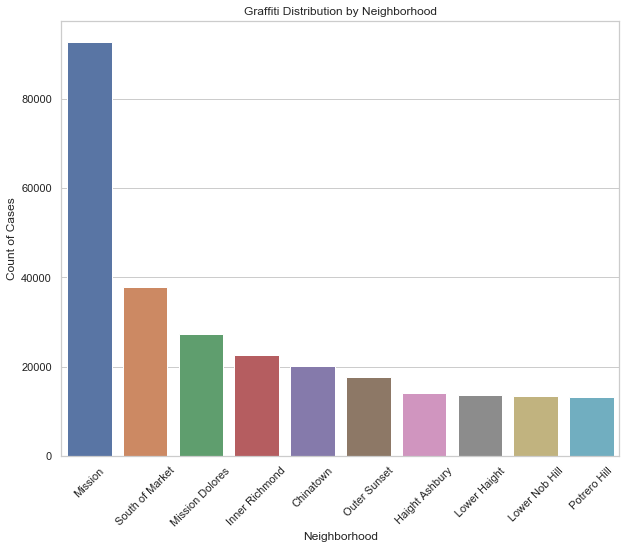

In [31]:
plt.figure(figsize = (10, 8))
sns.set(style="whitegrid")
chart = sns.barplot('neighborhood', 'counts', data = top_10_neighborhoood_counts)
plt.xlabel('Neighborhood')
plt.ylabel('Count of Cases')
plt.title('Graffiti Distribution by Neighborhood')
plt.setp(chart.get_xticklabels(), rotation=45);

#### Let's find out more about the Mission. 
<ol>
    <li>How have the counts changed over time? Have they increased or decreased?</li>
    <li>What kind of economic data can we bring in about the city? About the Mission?</li>

In [43]:
mission = sf_graffiti[(sf_graffiti.neighborhood.isin(['Mission']))]
mission_open = sf_graffiti[(sf_graffiti.neighborhood.isin(['Mission']) &
                           sf_graffiti.status.isin(['Open']))]
mission_closed = sf_graffiti[(sf_graffiti.neighborhood.isin(['Mission']) &
                             sf_graffiti.status.isin(['Closed']))]

In [ ]:
#sns.lineplot(x = 'opened_year', y = 'status', data = mission_open)
#plt.show()

In [41]:
### I want to plot the counts for each year for the Mission

mission.groupby('opened_year')['status'].value_counts()

opened_year  status
2008         Closed     1244
2009         Closed     5306
2010         Closed     3742
2011         Closed     2638
             Open          1
2012         Closed     4015
             Open          3
2013         Closed     5807
             Open          6
2014         Closed     7294
             Open          4
2015         Closed    10154
             Open         10
2016         Closed    12941
             Open          8
2017         Closed    12339
             Open         41
2018         Closed    13456
             Open         18
2019         Closed     9349
             Open         13
2020         Closed     4172
             Open        260
Name: status, dtype: int64

In [12]:
san_francisco = [37.773972, -122.431297]
san_francisco_map = folium.Map(location = san_francisco, zoom_start = 13)

display(san_francisco_map)